In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
!pip install imutils
import imutils 

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
bgr_img = cv2.imread("ittsp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1280, height=720, depth=3


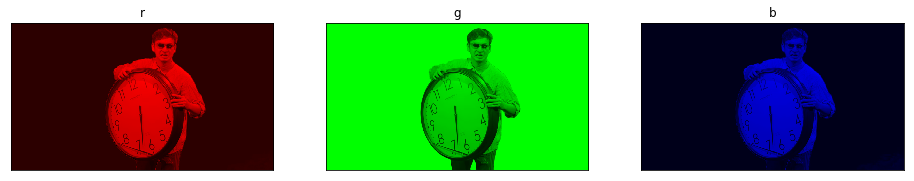

In [3]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [32]:
#take the color
(R, G, B) = image[719, 1279]
print("R={}, G={}, B={}".format(R, G, B))

R=46, G=255, B=38


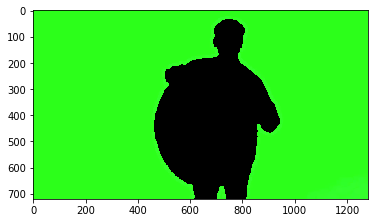

In [70]:
lowerBound = np.array([43,249,25])
upperBound = np.array([53,255,45])
mask = cv2.inRange(image,lowerBound,upperBound);
plt.imshow(mask)
kernel = np.ones((8,8),np.uint8) 
image_result = cv2.bitwise_and(image,image,mask=mask)
img = cv2.morphologyEx(image_result,cv2.MORPH_CLOSE,kernel)
mask = img.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')




In [71]:
img3 =cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
img3.dtype
cnts = cv2.findContours(img3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

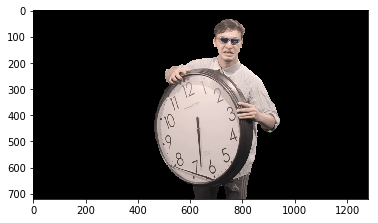

In [72]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), -1)
    
plt.imshow(output)

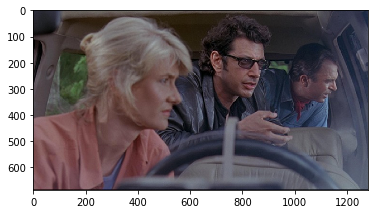

error: OpenCV(3.4.2) /io/opencv/modules/core/src/arithm.cpp:241: error: (-215:Assertion failed) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function 'binary_op'
